# INTRODUCTION
Task as a part of internship at THE SPARKS FOUNDATION (TSF) under Graduate Rotational Internship Program (GRIP) March 2022

Task #1: Predict the percentage of an student based on the no. of study hours.

Dataset: http://bit.ly/w-data

# Importing library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.linear_model import LinearRegression

# Loading data 

In [2]:
data = pd.read_csv('student score.csv')

In [3]:
data 

,hours,score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# general information about data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data[data['score']==data['score'].max()]

,hours,score
15,8.9,95


In [6]:
data['score'].min()

17

In [7]:
data.describe()

,hours,score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


the releation the study score and study hours represented by scatter plot 

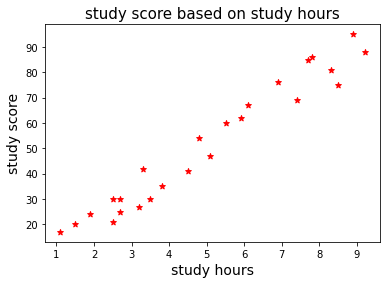

In [8]:
plt.scatter(x = data['hours'] , y = data['score'], marker='*', color= 'r')
plt.xlabel('study hours',fontsize= 14)
plt.ylabel('study score',fontsize=14)
plt.title('study score based on study hours', fontsize= 15)
plt.show()

# data pre_processing 

In [9]:
data.isna().sum()

hours    0
score    0
dtype: int64

In [10]:
data.mean()

hours     5.012
score    51.480
dtype: float64

# bulding model 

In [11]:
#spliting data into tarin_set and test_set
X = data.drop("score",axis=1)
y = data.drop("hours",axis=1)

In [12]:
print(y.shape)
print(X.shape)

(25, 1)
(25, 1)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train )

LinearRegression()

In [18]:
lr.coef_

array([[9.91065648]])

In [19]:
lr.intercept_

array([2.01816004])

<AxesSubplot:xlabel='hours', ylabel='score'>

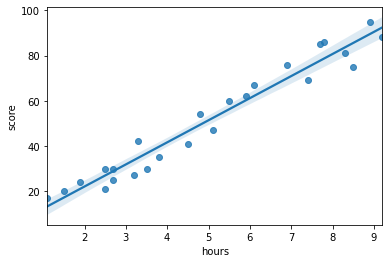

In [20]:
sns.regplot(x= 'hours' , y= 'score',data = data)

In [21]:
y_pred=lr.predict(X_test)

In [22]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [23]:
X_test

,hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [24]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns= ['X_test','y_test', 'y_pred'])

,X_test,y_test,y_pred
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


# model evaluation 

In [25]:

print('accuracy of train darta =', lr.score(X_train,y_train))
print('accuracy of test data =' , lr.score(X_test, y_test))

accuracy of train darta = 0.9515510725211552
accuracy of test data = 0.9454906892105356


In [26]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [27]:
score1= r2_score(X_test,y_pred)
score2= mean_squared_error(X_test,y_pred)
score3= mean_absolute_error(X_test,y_pred)

In [28]:
print('r2_score =',score1)
print('mean_squared_error =',score2)
print('mean_absolute_error =',score3)

r2_score = -384.7158052471942
mean_squared_error = 1871.4930870593864
mean_absolute_error = 38.55185161206786


# when the study houres is 9.25

In [43]:
houer=float(input("\n Enter Study Houres: "))
houres = [[houer]] 
predicted_score = lr.predict(houres)  
print("Prediction Score = {}".format(predicted_score)) 



 Enter Study Houres: 9.25
Prediction Score = [[93.69173249]]
